In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# pdo - first principal component of SST in north Pacific
# + = warm off CA  - = warm offshore
# data format is year and month.
df = pd.read_csv('pdo.dat', skiprows=1)
df.head()

,Date,Value
0,185401,-1.17
1,185402,-0.95
2,185403,-0.75
3,185404,-0.52
4,185405,-0.52


In [3]:
df['datetime'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m')

In [4]:
pdo = df['Value']
t = np.arange(0, len(pdo)) # Months since 1854
time = t/12  # Now in years

<IPython.core.display.Javascript object>


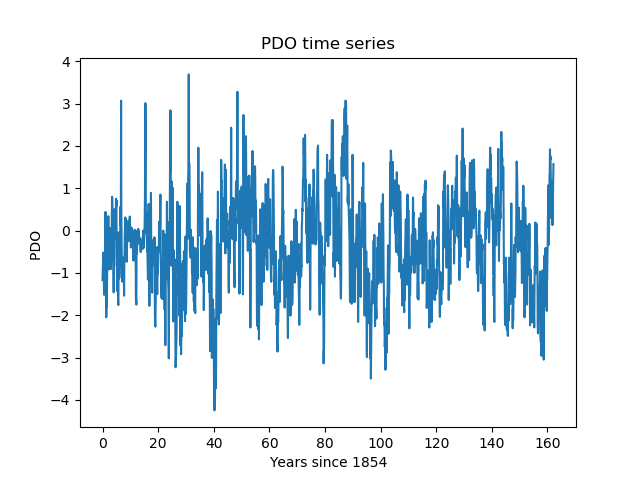

Text(0.5,1,'PDO time series')

In [12]:
plt.figure()
plt.plot(time, pdo)
plt.xlabel('Years since 1854')
plt.ylabel('PDO ')
plt.title('PDO time series')


<IPython.core.display.Javascript object>


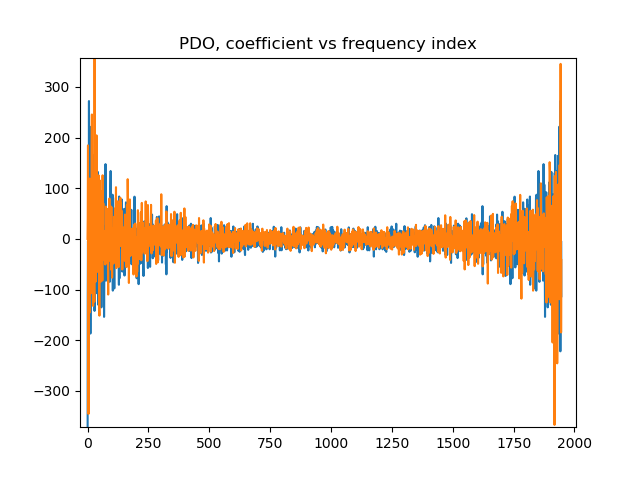

Text(0.5,1,'PDO, coefficient vs frequency index')

In [13]:
pdo_fft = np.fft.fft(pdo)
np.shape(pdo_fft)  # Shape matches number of observations
plt.figure()
plt.plot(np.real(pdo_fft))
plt.plot(np.imag(pdo_fft))
plt.title('PDO, coefficient vs frequency index')

Fundamental freq = 0.00616649537513 Nyqist freq =  6.0  in cycles per year


<IPython.core.display.Javascript object>


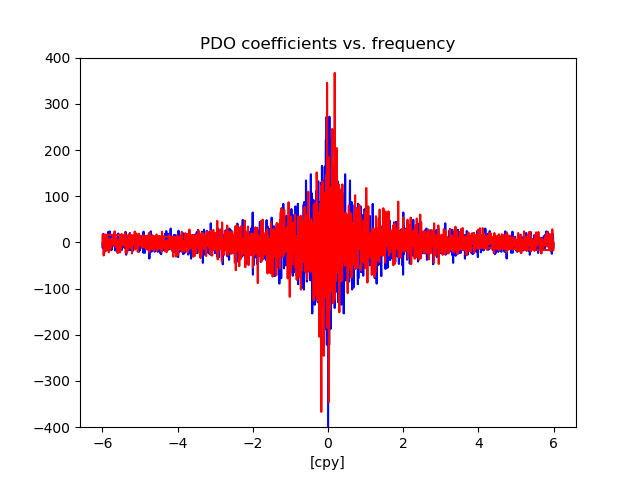

Text(0.5,1,'PDO coefficients vs. frequency')

In [31]:
# Figure out frequencies for each coefficient - but use the library to make it easy.
N = len(pdo)
f_fund = 1/(time[-1] - time[0])
# Nyquist is 1/(2dt)
dt = (time[-1] - time[0]) / (len(time)-1)
f_nyq = 1/(2.0*dt)
print('Fundamental freq =', f_fund,
      'Nyqist freq = ', f_nyq,' in cycles per year')

f = np.fft.fftfreq(N, dt)

plt.figure()
plt.plot(f, np.real(pdo_fft), 'b-')
plt.plot(f, np.imag(pdo_fft), 'r-')
plt.ylim([-400, 400])
plt.xlabel('[cpy]')
plt.title('PDO coefficients vs. frequency')

<IPython.core.display.Javascript object>


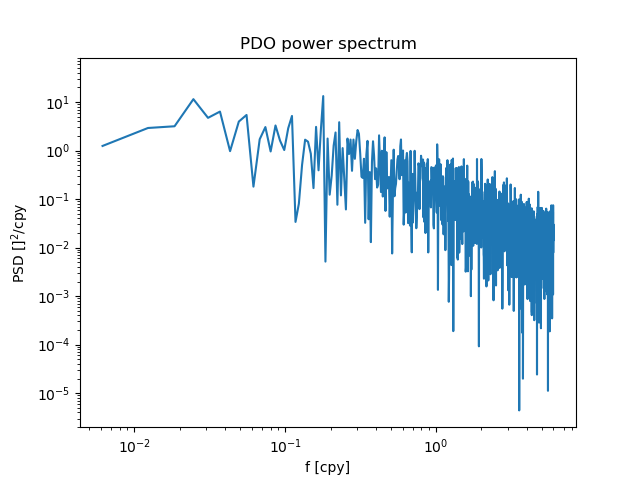

Text(0.5,1,'PDO power spectrum')

In [33]:
S_pdo = (2/N)*dt*np.abs(pdo_fft)**2
plt.figure()
plt.loglog()
plt.plot(f[0:round(N/2)], S_pdo[0:round(N/2)])
plt.xlabel('f [cpy]')
# PDO has no units
plt.ylabel('PSD []$^2$/cpy')  #Power spectral density
plt.title('PDO power spectrum')

We can compute confidence intervals for the values!  Ci is wide when noisy like this.
scipy has a shortcut function for most of this.
We have a bias toward some frequencies! (why?)
